# Read, Display and Write an Image using OpenCV


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading an image
# --> imread(filename, flags)
# Flags: cv2.IMREAD_UNCHANGED  or -1 // cv2.IMREAD_GRAYSCALE  or 0 // cv2.IMREAD_COLOR  or 1 (default = 1)
# Note: OpenCV reads color images in BGR format. So, when using OpenCV with other toolkits, remember to swap the blue and red color channels
img_color = cv2.imread('1.jpg',cv2.IMREAD_COLOR)
img_grayscale = cv2.imread('1.jpg',cv2.IMREAD_GRAYSCALE)
img_unchanged = cv2.imread('1.jpg',cv2.IMREAD_UNCHANGED)

Text(0.5, 1.0, 'color image')

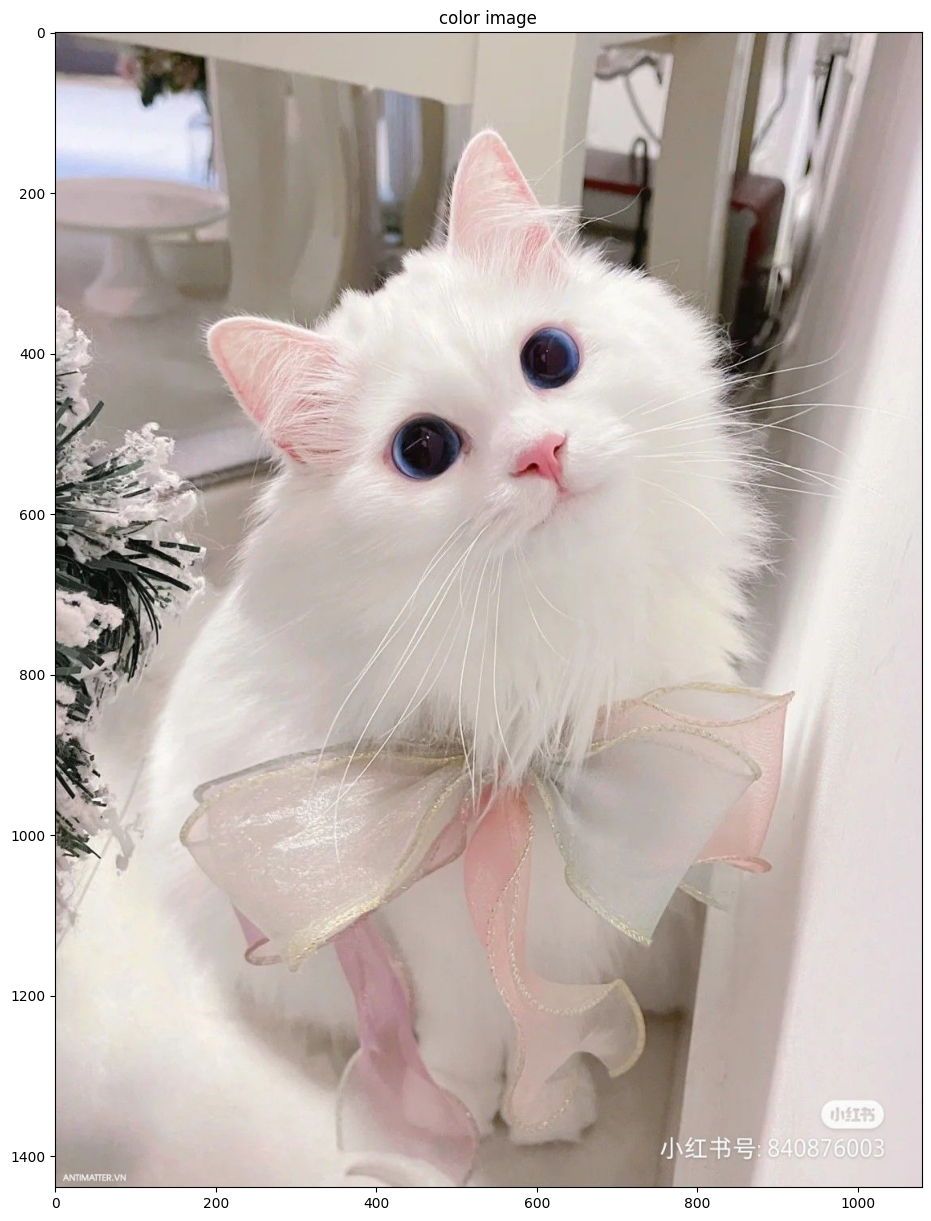

In [3]:
# displaying an image
# --> imshow(window_name, image)
cv2.imshow('color image',img_color)  
cv2.imshow('grayscale image',img_grayscale)
cv2.imshow('unchanged image',img_unchanged)
 
# Waits for a keystroke
# Some example for waitKey:
# --> cv2.waitKey(2000): the window will be displayed (miliseconds)
# --> cv2.waitKey(0): waits indefinitely for a keystroke
cv2.waitKey(0)  
 
# Destroys all the windows created
cv2.destroyAllWindows() 

plt.figure(figsize=[15,15])
plt.imshow(img_color[:,:,::-1]);plt.title("color image")

In [4]:
# writing/saving an image
# --> imwrite(filename, image)
cv2.imwrite('grayscale.jpg',img_grayscale)

True

# Image Resizing with OpenCV


Thay đổi kích thước với các phương pháp nội suy khác nhau:

Các phương pháp nội suy khác nhau được sử dụng cho các mục đích thay đổi kích thước khác nhau.

INTER_AREA: sử dụng mối quan hệ diện tích pixel để lấy mẫu lại. Phương pháp này phù hợp nhất để giảm kích thước của hình ảnh (thu nhỏ).

INTER_CUBIC: Phương pháp này sử dụng nội suy bicubic để thay đổi kích thước hình ảnh. Khi thay đổi kích thước và nội suy các pixel mới, phương pháp này tác động đến 4×4 pixel lân cận của hình ảnh. Sau đó, nó tính trung bình trọng số của 16 pixel để tạo ra pixel nội suy mới.

INTER_LINEAR: Phương pháp này tương tự với nội suy INTER_CUBIC. Nhưng khác với INTER_CUBIC, phương pháp này chỉ sử dụng 2×2 pixel lân cận để lấy trung bình trọng số cho pixel nội suy.

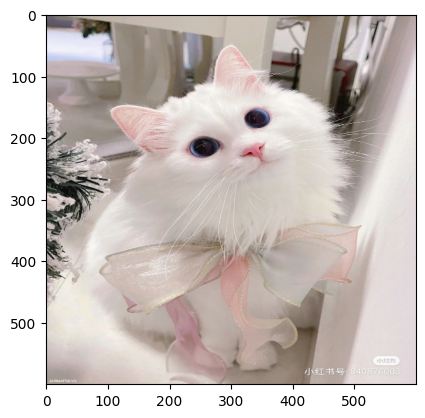

In [9]:
# Resizing by Specifying Width and Height
resized_Down = cv2.resize(img_color, (600, 600), interpolation= cv2.INTER_LINEAR)
plt.imshow(resized_Down[:,:,::-1])

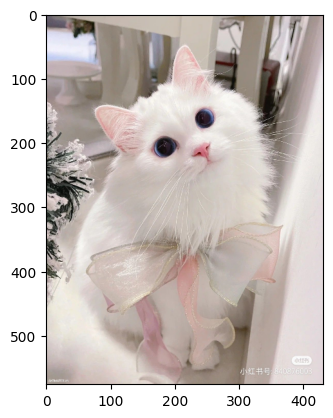

In [7]:
# Resizing With a Scaling Factor
scaledDown = cv2.resize(img_color, None, fx= 0.4, fy= 0.4, interpolation= cv2.INTER_LINEAR)
plt.imshow(scaledDown[:,:,::-1])

# Cropping an Image using OpenCV


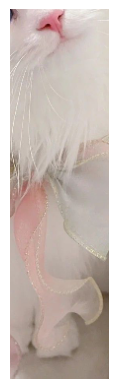

In [14]:
# cropping an image
cropped_image = scaledDown[200:600, 200:300]
# plt.imshow(cropped_image[:,:,::-1])
plt.axis("off")
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

# Image Translation and Rotation Using OpenCV


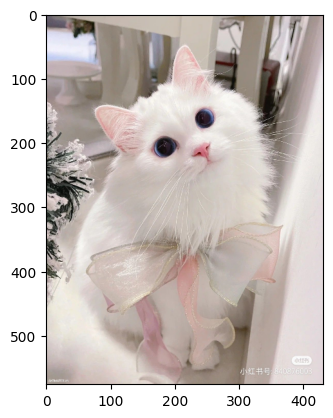

In [15]:
# caculate the center
height, width = scaledDown.shape[:2]
center = (width/2, height/2)
plt.imshow(scaledDown[:, :, ::-1])

In [16]:
# use cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=0.5)
print(rotate_matrix)

[[  0.35355339   0.35355339  37.80909114]
 [ -0.35355339   0.35355339 262.54415588]]


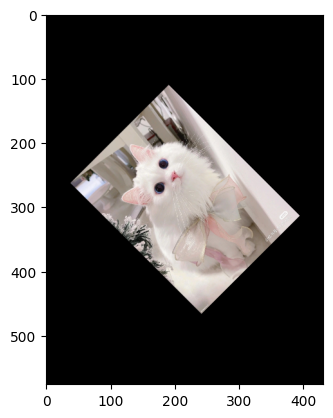

In [17]:
# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=scaledDown, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image[:, :, ::-1])

In [20]:
# transition image
# tx: how much units we want to move the image in x-direction
# ty: how much units we want to move the image in y-direction
tx, ty = width / 4, height / 4 
# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

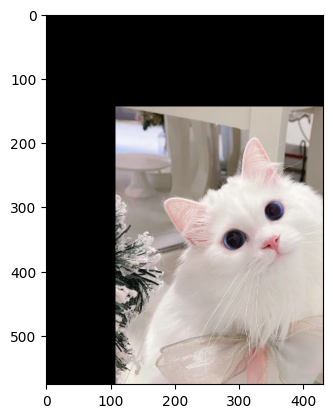

In [21]:
# apply the translation to the image
translated_image = cv2.warpAffine(
    src=scaledDown, M=translation_matrix, dsize=(width, height)
)
plt.imshow(translated_image[:, :, ::-1])

# Affine Transformation

Trong phép biến đổi affine, tất cả các đường thẳng song song trong ảnh gốc sẽ vẫn song song trong ảnh đầu ra. Để tìm ma trận biến đổi, chúng ta cần ba điểm từ ảnh đầu vào và vị trí tương ứng của chúng trong ảnh đầu ra. 
Sau đó cv2.getAffineTransform sẽ tạo một ma trận 2x3 để chuyển tới cv2.warpAffine .

Công thức cho biến đổi Affine:

x', y' = [ [a b c] [d e f] ] * x y 1 (ma trận 2x1 = 2x3 x 3x1)

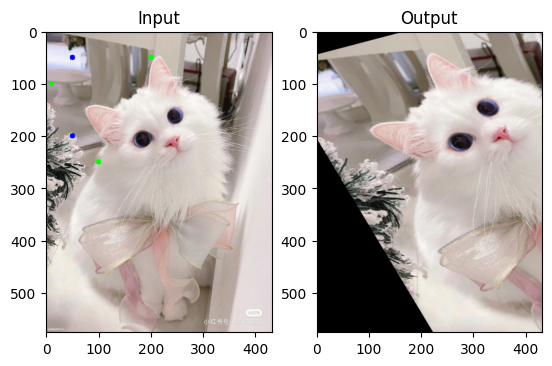

In [23]:
rows, cols, chanels = scaledDown.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(scaledDown, M, (cols,rows))

for point in pts1:
    cv2.circle(scaledDown, (int(point[0]), int(point[1])), 5, (255, 0, 0), -1)  # Vẽ vòng tròn đỏ

for point in pts2:
    cv2.circle(scaledDown, (int(point[0]), int(point[1])), 5, (0, 255, 0), -1)  # Vẽ vòng tròn đỏ

plt.subplot(121),plt.imshow(scaledDown[:,:,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title('Output')
plt.show()

# Perspective Transformation

Để chuyển đổi phối cảnh, bạn cần ma trận chuyển đổi 3x3. Các đường thẳng sẽ vẫn thẳng ngay cả sau khi biến đổi. Để tìm ma trận biến đổi này, bạn cần 4 điểm trên ảnh đầu vào và các điểm tương ứng trên ảnh đầu ra. Trong 4 điểm đó có 3 điểm không thẳng hàng. Sau đó, ma trận biến đổi có thể được tìm thấy bằng hàm cv2.getPerspectiveTransform . Sau đó áp dụng cv2.warpPerspective với ma trận chuyển đổi 3x3 này.

Nguyên tắc là cần tìm ma trận 3x3: [a11 a12 a13 a21 a22 a23 a31 a32 a33] để biến đổi từ (x,y) sang (x',y') theo công thức:

x' = (a11 * x + a12 * y + a13) / (a31 * x + a32 * y + a33)

y' = (a21 * x + a22 * y + a23) / (a31 * x + a32 * y + a33)

Từ 4 cặp điểm cung cấp, hàm cv2.getPerspectiveTransform sẽ giải tìm ma trận sử dụng hệ phương trình tuyến tính

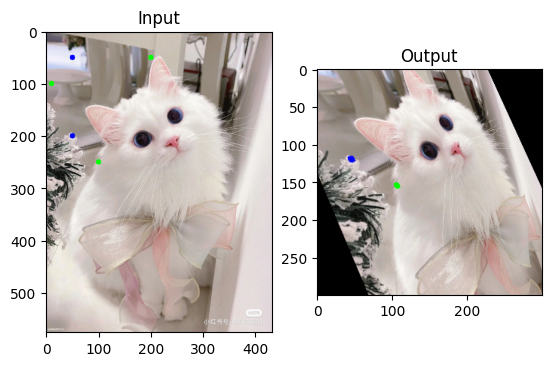

In [24]:
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[200,0],[100,300],[300,200]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(scaledDown,M,(300,300))

plt.subplot(121),plt.imshow(scaledDown[:,:,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title('Output')
plt.show()

# Annotating Images Using OpenCV

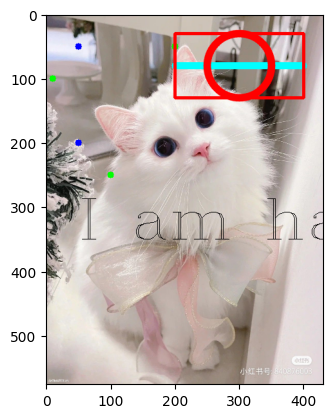

In [29]:
plt.imshow(scaledDown[:, :, ::-1])

# Draw a line
imageDraw = scaledDown.copy()
pointStart = (200,80)
pointEnd = (400,80)
cv2.line(imageDraw, pointStart, pointEnd, (255, 255, 0), thickness=10)

# Draw a cycle
circle_center = (300,80)
radius =50
cv2.circle(imageDraw, circle_center, radius, (0, 0, 255), thickness=10, lineType=cv2.LINE_AA) 

# Draw a rectangle
start_point =(200,30)
end_point =(400,130)
cv2.rectangle(imageDraw, start_point, end_point, (0, 0, 255), thickness= 3, lineType=cv2.LINE_8) 

# Draw a text
text = 'I am happy!'
org = (50,350)
cv2.putText(imageDraw, text, org, fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 3, color = (0,0,0))

plt.imshow(imageDraw[:, :, ::-1])